<a href="https://colab.research.google.com/github/leone2497/Anomalies-detection/blob/main/Anomalies_detection_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
from google.colab import drive

In [19]:
Database= pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Heart failure.xlsx")
Database

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
Database.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [21]:
len(Database['age'])

299

In [22]:
max(Database['age'])

60667

In [23]:
New_database = Database[Database['age'] <110]
New_database
#let's delete the age rows outliers

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


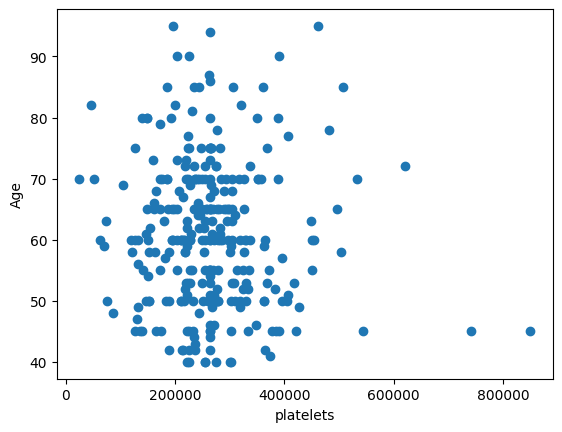

In [24]:
plt.scatter(New_database['platelets'],New_database['age'])
plt.ylabel('Age')
plt.xlabel('platelets')
plt.show()
#let's plot the platelets, the variable we are going to identify some outliers

In [25]:
from sklearn.cluster import DBSCAN
Data = New_database['platelets'].to_numpy()
Data = Data.reshape(-1, 1)
Data


array([[265000.  ],
       [263358.03],
       [162000.  ],
       [210000.  ],
       [327000.  ],
       [204000.  ],
       [127000.  ],
       [454000.  ],
       [263358.03],
       [388000.  ],
       [368000.  ],
       [253000.  ],
       [136000.  ],
       [276000.  ],
       [427000.  ],
       [ 47000.  ],
       [262000.  ],
       [166000.  ],
       [237000.  ],
       [ 87000.  ],
       [276000.  ],
       [297000.  ],
       [289000.  ],
       [368000.  ],
       [263358.03],
       [149000.  ],
       [196000.  ],
       [284000.  ],
       [153000.  ],
       [200000.  ],
       [263358.03],
       [360000.  ],
       [319000.  ],
       [302000.  ],
       [188000.  ],
       [228000.  ],
       [226000.  ],
       [321000.  ],
       [305000.  ],
       [329000.  ],
       [263358.03],
       [153000.  ],
       [185000.  ],
       [218000.  ],
       [194000.  ],
       [310000.  ],
       [271000.  ],
       [451000.  ],
       [140000.  ],
       [395000.  ],


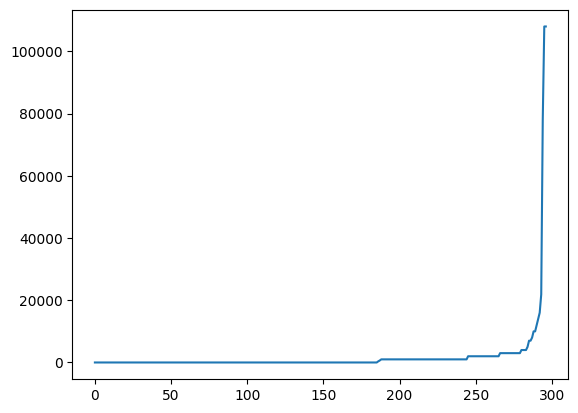

In [26]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(Data)
distances, indices = neighbors_fit.kneighbors(Data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

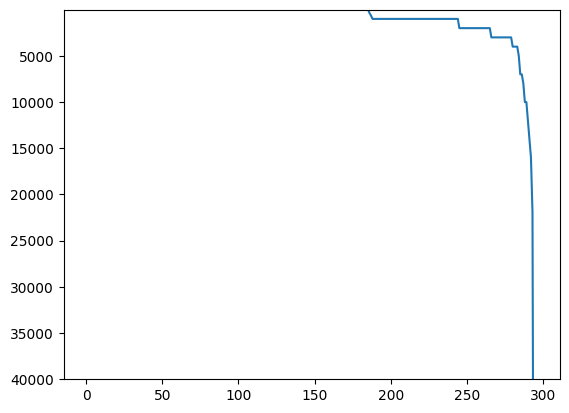

In [27]:
#The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.

plt.ylim(40000)
plt.plot(distances)

In [28]:
distances

array([     0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  , 

In [62]:
Values = [(20000,13),(20000,26),(25000,13),(25000,26),(30000,13),(30000,26),(35000,13),(35000,26)]
Values
#however instead pf using the "crook of the elbow" values, we can try different solution and see which is the best for the min_samples, for the eps if your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

[(20000, 13),
 (20000, 26),
 (25000, 13),
 (25000, 26),
 (30000, 13),
 (30000, 26),
 (35000, 13),
 (35000, 26)]

In [30]:
Values= np.array(Values)
Values

array([[20000,    13],
       [20000,    26],
       [25000,    13],
       [25000,    26],
       [30000,    13],
       [30000,    26],
       [35000,    13],
       [35000,    26]])

In [35]:
#let’s define a function to use the silhouette_score, the assess the best pair of EPS and MIN_SAMPLES values to use to identify anomalies
def best_dbscan(eps_A,min_samples_B):
  dbscan = DBSCAN(eps= eps_A, min_samples=min_samples_B)
  labels = dbscan.fit_predict(Data)
  Silhouette_score=metrics.silhouette_score(Data, labels)
  return Silhouette_score



In [38]:
from sklearn import metrics
Score =[]
for row in Values:
  eps_A= row[0]
  min_samples_B= row[1]
  Result= best_dbscan(eps_A,min_samples_B)
  Score.append((Result,eps_A,min_samples_B))



In [39]:
max_index = max(range(len(Score)), key=lambda i: Score[i][0])
print('Best score:',Score[max_index ][0])
print('Eps:',Score[max_index ][1])
print('Min_samples:',Score[max_index ][2])

Best score: 0.6788254230007783
Eps: 35000
Min_samples: 13


In [52]:
dbscan = DBSCAN(eps=Score[max_index ][1],min_samples=Score[max_index ][2])
labels = dbscan.fit_predict(Data)

In [54]:

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

In [55]:
Data[ labels ==-1]

array([[ 47000.],
       [497000.],
       [621000.],
       [850000.],
       [507000.],
       [481000.],
       [504000.],
       [ 62000.],
       [533000.],
       [ 25100.],
       [ 51000.],
       [543000.],
       [742000.]])

In [56]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

In [57]:
New_database['Anomalies plateles']= labels

<ipython-input-57-43b3263ea8ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_database['Anomalies plateles']= labels


In [58]:
New_database[New_database['Anomalies plateles']==-1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Anomalies plateles
15,82,1,379,0,50,0,47000.0,1.30,136,1,0,13,1,-1
69,65,0,113,1,25,0,497000.0,1.83,135,1,0,67,1,-1
105,72,1,328,0,30,1,621000.0,1.70,138,0,1,88,1,-1
109,45,0,292,1,35,0,850000.0,1.30,142,1,1,88,0,-1
117,85,1,102,0,60,0,507000.0,3.20,138,0,0,94,0,-1
212,78,0,224,0,50,0,481000.0,1.40,138,1,1,192,0,-1
224,58,0,582,1,25,0,504000.0,1.00,138,1,0,205,0,-1
230,60,0,166,0,30,0,62000.0,1.70,127,0,0,207,1,-1
240,70,0,81,1,35,1,533000.0,1.30,139,0,0,212,0,-1
277,70,0,582,1,38,0,25100.0,1.10,140,1,0,246,0,-1


In [59]:
Anomalies= Data[labels ==-1]
Anomalies
print('Number of anomalies:', len(Anomalies))
print('Max anomalies:', max(Anomalies))
print('Min anomalies:', min(Anomalies))

Number of anomalies: 13
Max anomalies: [850000.]
Min anomalies: [25100.]


In [60]:
Normal_points=Data[ labels !=-1]
Anomalies
print('Number of Normal_points:', len(Normal_points))
print('Max Normal_points:', max(Normal_points))
print('min Normal_points:', min(Normal_points))

Number of Normal_points: 284
Max Normal_points: [461000.]
min Normal_points: [70000.]


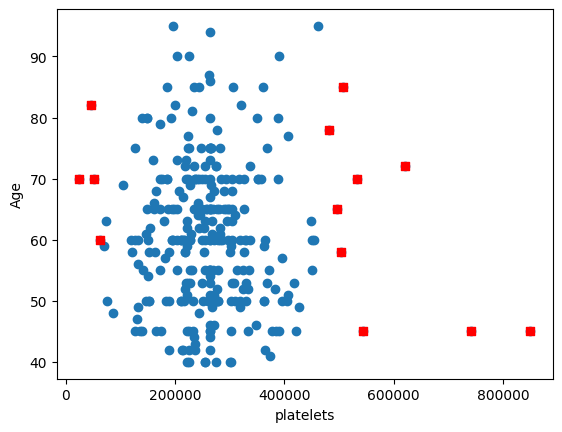

In [61]:
plt.scatter(New_database['platelets'],New_database['age'])
plt.scatter(New_database['platelets'][New_database['Anomalies plateles'] == -1],New_database['age'][New_database['Anomalies plateles'] == -1], color="red", marker='s')
plt.ylabel('Age')
plt.xlabel('platelets')
plt.show()
#here we want to plot all the values, highlighting the ones that are identified as anomalies